In [1]:
import pickle
import warnings
import pandas as pd
import numpy as np

from datetime import datetime, timezone
from ecoselekt.settings import settings

warnings.filterwarnings('ignore')

In [2]:
delta_df = pd.DataFrame(columns=["project", "windowi", "windowj", "months"])

for project_name in settings.PROJECTS:
    with open(settings.DATA_DIR / f"{settings.EXP_ID}_{project_name}_windows.pkl", "rb") as f:
        windows = pickle.load(f)
    print(f"{project_name}: {len(windows)}")
    for windowi in range(len(windows)-1):
        for windowj in range(windowi+1, len(windows)):
            x = datetime.fromtimestamp(windows[windowi]["author_date"].min(), tz=timezone.utc)
            y = datetime.fromtimestamp(windows[windowj]["author_date"].max(), tz=timezone.utc)
            delta_df = delta_df.append(
                {
                    "project": project_name,
                    "windowi": windowi,
                    "windowj": windowj,
                    "months": (y-x).days//30
                },
                ignore_index=True
            )

delta_df.head()

activemq: 26
camel: 109
cassandra: 36
flink: 54
groovy: 36
hbase: 39
hive: 30
ignite: 56


,project,windowi,windowj,months
0,activemq,0,1,12
1,activemq,0,2,15
2,activemq,0,3,21
3,activemq,0,4,26
4,activemq,0,5,28


In [3]:
delta_df[(delta_df["project"] == "camel") & (delta_df["windowi"] == 16) & (delta_df["windowj"] == 86)]

,project,windowi,windowj,months
2002,camel,16,86,101


In [4]:
months = []
for project_name in settings.PROJECTS:
    with open(settings.DATA_DIR / f"{settings.EXP_ID}_{project_name}_windows.pkl", "rb") as f:
        windows = pickle.load(f)
    for i in range(1, len(windows)-15):
        x = datetime.fromtimestamp(windows[i]["author_date"].min(), tz=timezone.utc)
        y = datetime.fromtimestamp(windows[i+15]["author_date"].max(), tz=timezone.utc)
        months.append((y-x).days//30)
print(f"min: {min(months)} max: {max(months)} median: {np.median(months)} mean: {np.mean(months)}")

min: 8 max: 123 median: 33.0 mean: 41.89922480620155


In [5]:
days = []

for project_name in settings.PROJECTS:
    with open(settings.DATA_DIR / f"{settings.EXP_ID}_{project_name}_windows.pkl", "rb") as f:
        windows = pickle.load(f)
    for window in windows:
        x = datetime.fromtimestamp(window["author_date"].min(), tz=timezone.utc)
        y = datetime.fromtimestamp(window["author_date"].max(), tz=timezone.utc)
        days.append((y-x).days)

print(f"min: {min(days)} max: {max(days)} median: {np.median(days)} mean: {np.mean(days)}")

min: 27 max: 1561 median: 289.5 mean: 365.7383419689119


In [6]:
days = []

for project_name in settings.PROJECTS:
    with open(settings.DATA_DIR / f"{settings.EXP_ID}_{project_name}_windows.pkl", "rb") as f:
        windows = pickle.load(f)
    for window in windows[1:]:
        dlwindow = window[-200:]
        x = datetime.fromtimestamp(dlwindow["author_date"].min(), tz=timezone.utc)
        y = datetime.fromtimestamp(dlwindow["author_date"].max(), tz=timezone.utc)
        days.append((y-x).days)

print(f"min: {min(days)} max: {max(days)} median: {np.median(days)} mean: {np.mean(days)}")

min: 0 max: 601 median: 57.0 mean: 73.43121693121694


In [7]:
with open(settings.DATA_DIR / f"{settings.EXP_ID}_camel_windows.pkl", "rb") as f:
    windows = pickle.load(f)

for win in [0, 86, 87, 96, 97, 102, 103]:
    print(datetime.fromtimestamp(windows[win]["author_date"].min(), tz=timezone.utc), end=" ")
    print(datetime.fromtimestamp(windows[win]["author_date"].max(), tz=timezone.utc))

2007-03-19 10:54:57+00:00 2008-03-24 06:23:16+00:00
2017-05-05 11:30:33+00:00 2017-10-28 08:10:42+00:00
2017-05-30 15:50:51+00:00 2017-12-21 09:31:20+00:00
2018-07-19 13:49:06+00:00 2019-02-22 11:55:52+00:00
2018-09-14 12:21:21+00:00 2019-03-12 10:03:34+00:00
2019-03-12 10:04:43+00:00 2019-07-05 07:15:56+00:00
2019-04-05 09:56:43+00:00 2019-07-27 08:12:43+00:00


In [8]:
with open(settings.DATA_DIR / f"{settings.EXP_ID}_camel_windows.pkl", "rb") as f:
    windows = pickle.load(f)

pos_labels = [x["label"].value_counts()[1] for x in windows[15:87]]
# find median of pos_labels
print(np.median(pos_labels), np.mean(pos_labels), np.std(pos_labels))

pos_labels = [x["label"].value_counts()[1] for x in windows[87:97]]
# find median of pos_labels
print(np.median(pos_labels), np.mean(pos_labels), np.std(pos_labels))

pos_labels = [x["label"].value_counts()[1] for x in windows[97:104]]
# find median of pos_labels
print(np.median(pos_labels), np.mean(pos_labels), np.std(pos_labels))

pos_labels = [x["label"].value_counts()[1] for x in windows[104:]]
# find median of pos_labels
print(np.median(pos_labels), np.mean(pos_labels), np.std(pos_labels))

157.0 163.51388888888889 59.372644527676854
60.0 58.8 7.95989949685296
25.0 25.571428571428573 4.716449719776908
20.0 20.2 1.6


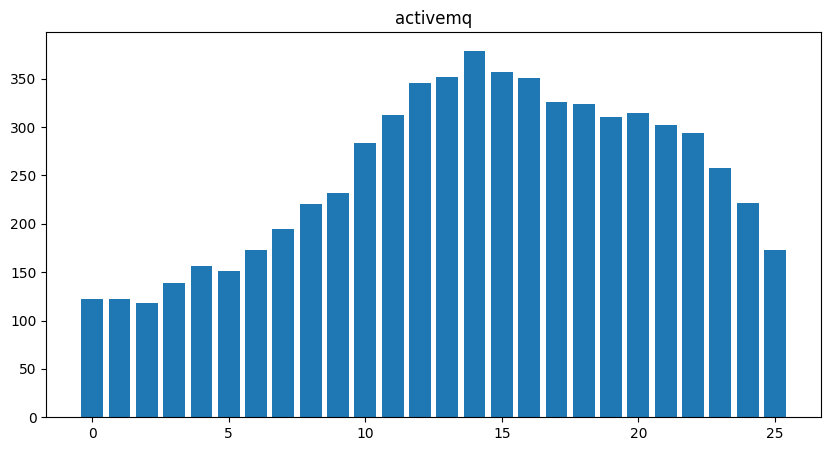

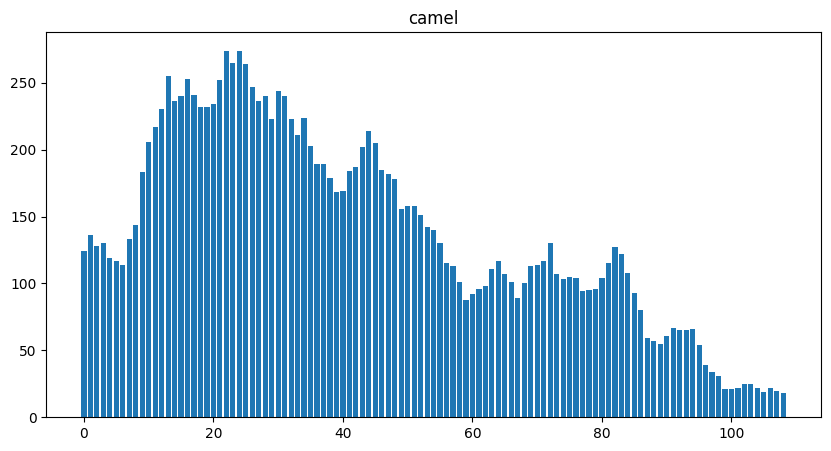

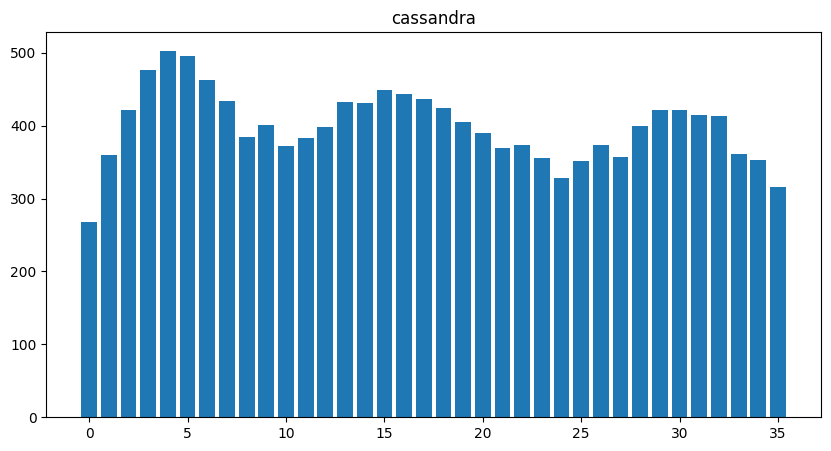

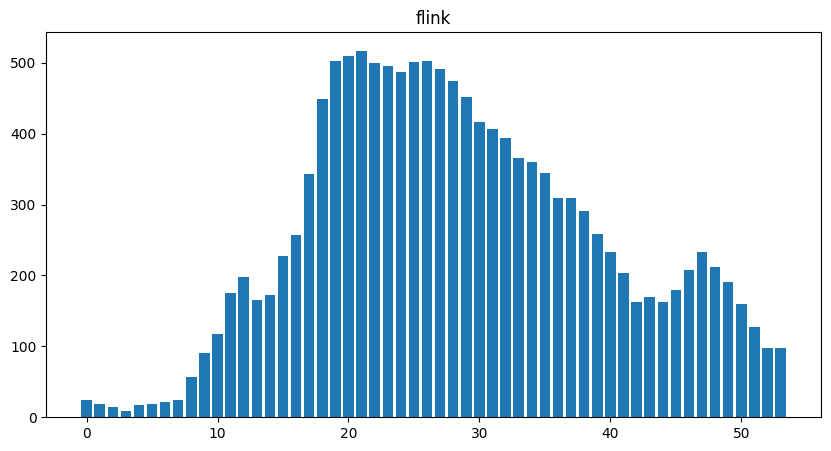

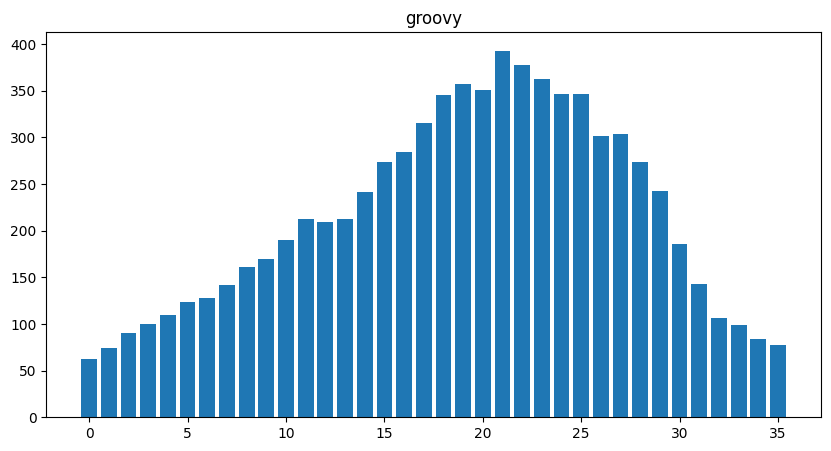

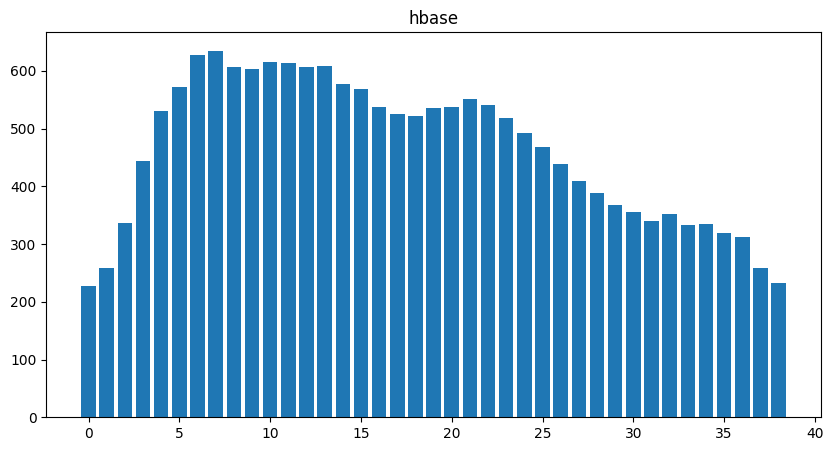

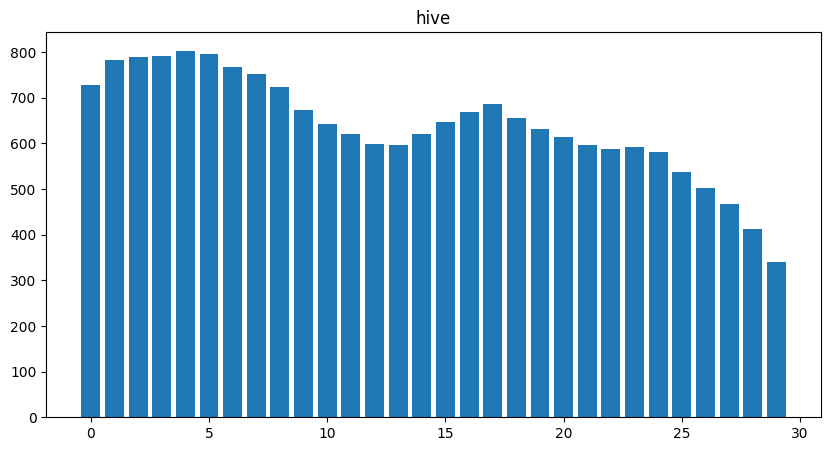

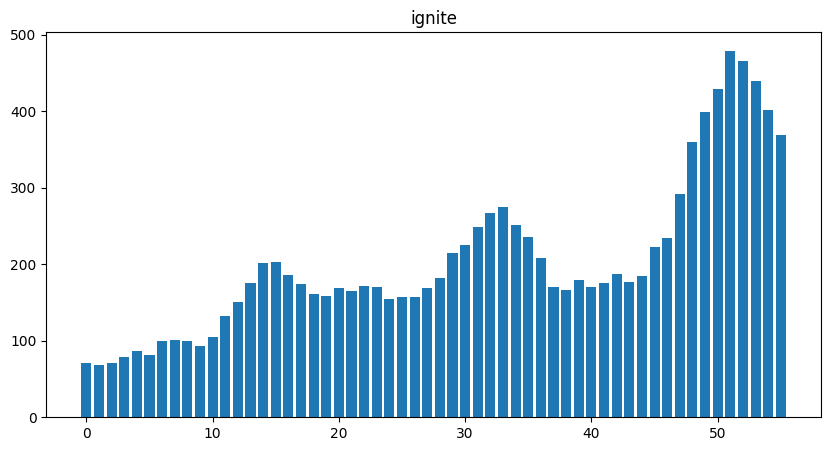

In [9]:
# plot bar plot of class labels for each project categorized by window
import matplotlib.pyplot as plt

for project_name in settings.PROJECTS:
    with open(settings.DATA_DIR / f"{settings.EXP_ID}_{project_name}_windows.pkl", "rb") as f:
        windows = pickle.load(f)
    plt.figure(figsize=(10, 5))
    plt.title(project_name)
    x = np.arange(len(windows))
    # y is class label counts for each window
    y = [window["label"].value_counts()[1] for window in windows]
    plt.bar(x, y)
    plt.show()

In [10]:
import re
import ecoselekt.consts as consts

def load_data(data):
    commit_id = data[0]
    label = data[1]
    all_code_change = data[3]

    def _preprocess_code_line(code_line):
        code_line = (
            code_line.replace("(", " ")
            .replace(")", " ")
            .replace("{", " ")
            .replace("}", " ")
            .replace("[", " ")
            .replace("]", " ")
            .replace(".", " ")
            .replace(":", " ")
            .replace(";", " ")
            .replace(",", " ")
            .replace(" _ ", "_")
        )
        code_line = re.sub("``.*``", "<STR>", code_line)
        code_line = re.sub("'.*'", "<STR>", code_line)
        code_line = re.sub('".*"', "<STR>", code_line)
        code_line = re.sub("\d+", "<NUM>", code_line)

        # remove python common tokens
        new_code = ""

        for tok in code_line.split():
            if tok not in consts.PYTHON_COMMON_TOKENS:
                new_code = new_code + tok + " "

        return new_code.strip()

    all_added_code = [
        " \n ".join(
            list(
                set(
                    [
                        _preprocess_code_line(code_line)
                        for ch in code_change
                        if len(ch["added_code"]) > 0
                        for code_line in ch["added_code"]
                        # remove comments
                        if not code_line.startswith("#")
                    ]
                )
            )
        )
        for code_change in all_code_change
    ]
    all_removed_code = [
        " \n ".join(
            list(
                set(
                    [
                        _preprocess_code_line(code_line)
                        for ch in code_change
                        if len(ch["removed_code"]) > 0
                        for code_line in ch["removed_code"]
                        # remove comments
                        if not code_line.startswith("#")
                    ]
                )
            )
        )
        for code_change in all_code_change
    ]

    return commit_id, label, all_added_code, all_removed_code

activemq: [479.5, 485.5, 467.5, 486.0, 423.0, 362.0, 338.0, 361.0, 393.5, 429.0, 494.5, 575.5, 595.0, 578.0, 660.0, 661.5, 640.5, 627.0, 668.0, 631.5, 628.0, 592.0, 702.0, 702.0, 704.5, 708.0]
camel: [1690.0, 1422.5, 1154.0, 1030.0, 1025.0, 988.0, 1009.5, 1020.0, 1078.0, 1129.5, 1323.5, 1266.0, 1245.5, 1208.0, 1199.5, 1209.0, 1281.5, 1261.5, 1376.0, 1128.0, 1000.0, 1015.5, 1033.0, 1003.0, 1282.5, 1163.5, 1230.5, 1226.5, 1064.0, 814.5, 892.0, 866.0, 851.5, 859.0, 904.0, 880.5, 878.0, 743.0, 660.0, 611.0, 620.0, 628.0, 732.0, 863.0, 978.5, 866.5, 776.0, 713.0, 622.0, 636.0, 778.0, 958.0, 1025.0, 994.5, 849.0, 780.5, 775.5, 716.5, 692.0, 722.5, 736.0, 724.5, 1037.0, 1077.5, 1053.5, 843.0, 824.0, 608.5, 624.5, 665.0, 806.0, 809.5, 877.0, 879.0, 854.0, 876.5, 916.5, 984.5, 1075.0, 1031.5, 985.5, 966.0, 959.0, 804.0, 802.5, 850.0, 848.5, 776.0, 790.5, 702.0, 750.5, 812.5, 874.5, 860.0, 840.5, 560.0, 462.5, 465.5, 336.0, 355.5, 428.0, 514.0, 451.0, 508.0, 391.0, 420.5, 398.5, 445.5, 528.0]
ca

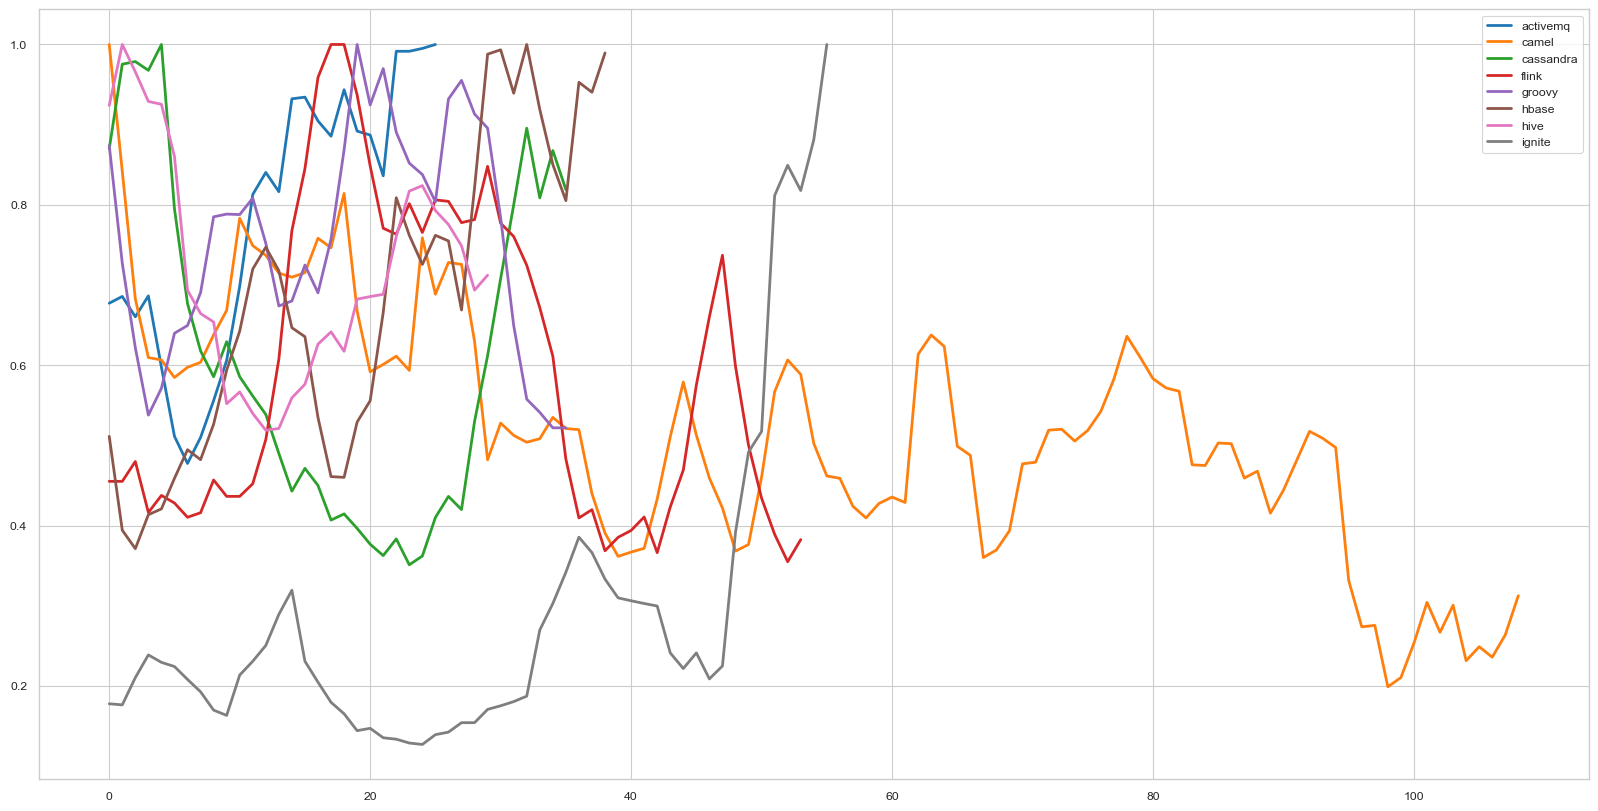

In [11]:
import ecoselekt.utils as utils

churn = {}
for project_name in settings.PROJECTS:
    churn[project_name] = []
    data = pickle.load(open(settings.DATA_DIR / f"apache_{project_name}_commits.pkl", "rb"))

    all_commit, all_label, all_added_code, all_removed_code = load_data(data)

    commit_metrics = utils.get_apachejit_commit_metrics(project_name)
    # !: should we keep time information?
    commit_metrics = commit_metrics.drop(
        ["fix", "year", "buggy"],
        axis=1,
    )
    commit_metrics = commit_metrics.fillna(value=0)

    # combine train and test code changes
    df = pd.DataFrame(
        {
            "commit_id": all_commit,
            "added_code": all_added_code,
            "removed_code": all_removed_code,
            "label": all_label,
        }
    )
    df = pd.merge(df, commit_metrics, on="commit_id")
    df = df.sort_values(by="author_date").reset_index(drop=True)
    windows = utils.get_sliding_windows(df, settings.WINDOW_SIZE, settings.SHIFT)
    for window in windows:
        churn[project_name].append(np.median([len(x) for x in window["added_code"]]))
    print(f"{project_name}: {churn[project_name]}")

# plot churn over time
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper")

fig, ax = plt.subplots(figsize=(20, 10))

for project_name in settings.PROJECTS:
    # normalize churn
    churn[project_name] = [x / max(churn[project_name]) for x in churn[project_name]]
    plt.plot(churn[project_name], label=project_name, figure=fig, linewidth=2)

plt.legend()
plt.show()

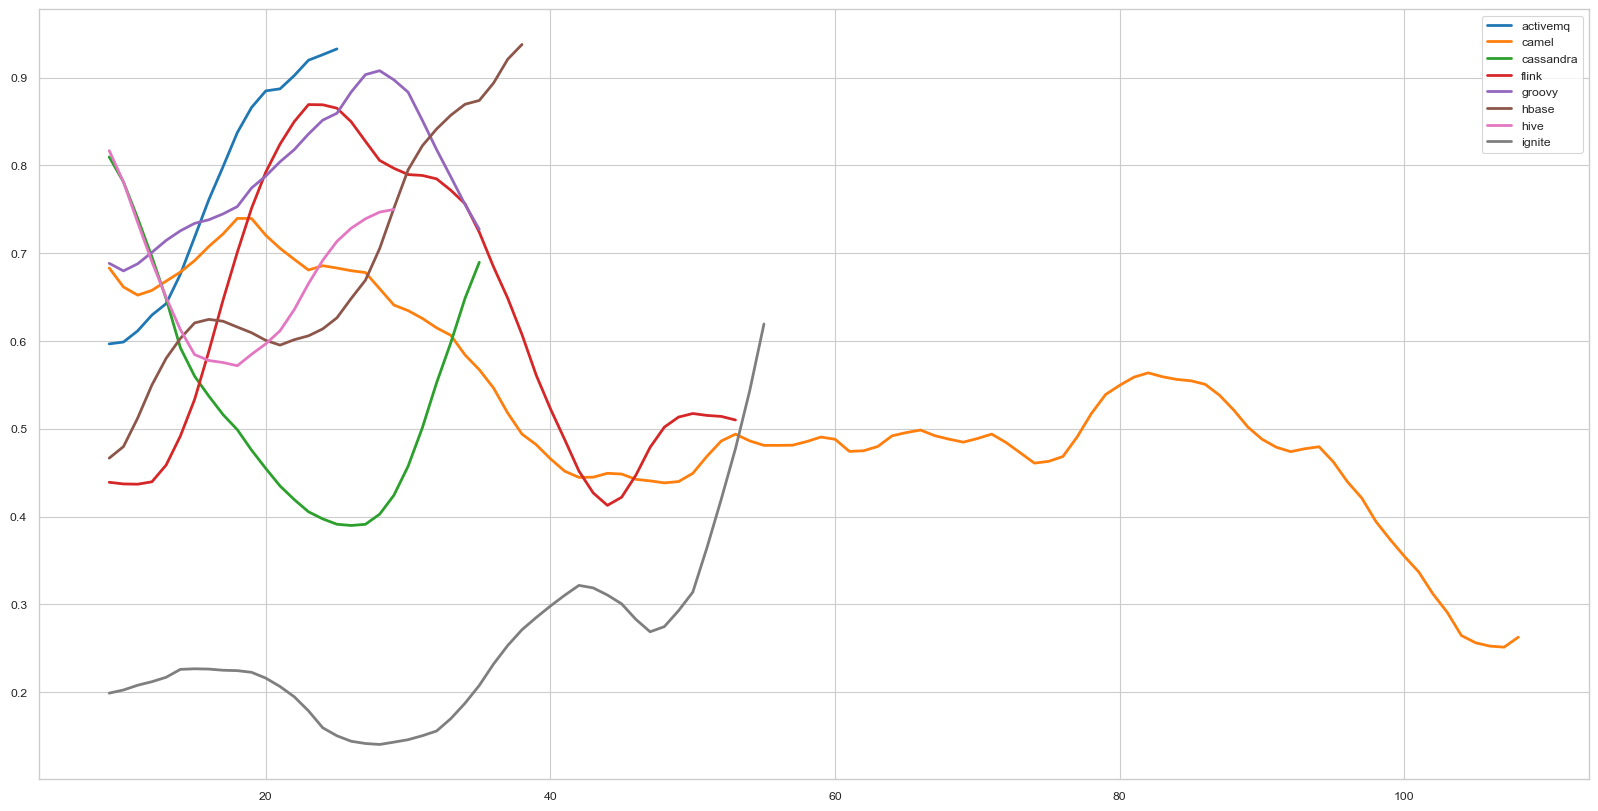

In [12]:
# plot running average of churn over time
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper")

fig, ax = plt.subplots(figsize=(20, 10))

for project_name in settings.PROJECTS:
    # normalize churn
    plt.plot(pd.Series(churn[project_name]).rolling(10).mean(), label=project_name, figure=fig, linewidth=2)

plt.legend()
plt.show()